# AAA Project : FC 24

This project is at the heart of the "Algorithms and Machine Learning" course at IMT Atlantique (Nantes, France). We have chosen to attempt to develop a machine learning model capable of predicting a player's rating based on their FC 24 card. This problem is a regression task that will use supervised machine learning and batch learning.

Here some common import that could be usefull for the project :

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## DATA

### A first look at the data set

In [25]:
df = pd.read_csv('all_players.csv')

In [26]:
df.head()

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17326 non-null  int64  
 1   Name            17326 non-null  object 
 2   Nation          17326 non-null  object 
 3   Club            17326 non-null  object 
 4   Position        17326 non-null  object 
 5   Age             17326 non-null  int64  
 6   Overall         17326 non-null  int64  
 7   Pace            17326 non-null  int64  
 8   Shooting        17326 non-null  int64  
 9   Passing         17326 non-null  int64  
 10  Dribbling       17326 non-null  int64  
 11  Defending       17326 non-null  int64  
 12  Physicality     17326 non-null  int64  
 13  Acceleration    17326 non-null  int64  
 14  Sprint          17326 non-null  int64  
 15  Positioning     17326 non-null  int64  
 16  Finishing       17326 non-null  int64  
 17  Shot            17326 non-null 

Too many missing values in the 'GK' features.

In [28]:
df = df.drop(['GK'], axis=1)

In [29]:
df.describe()

,Unnamed: 0,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,...,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
count,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,...,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000
mean,7308.093617,25.781658,66.980723,68.286448,54.803763,59.261284,56.852822,51.510216,65.663858,64.844049,...,52.604006,47.898361,49.738255,47.244661,66.759206,63.733176,65.608623,56.614799,2.949786,2.419081
std,4814.849700,4.655255,6.981987,10.657137,13.872357,9.776640,19.041291,16.439490,9.485501,15.319163,...,17.718303,20.692083,21.309042,20.771639,11.687863,16.440153,12.496360,16.892850,0.679713,0.794500
min,0.000000,17.000000,47.000000,27.000000,19.000000,25.000000,5.000000,15.000000,29.000000,14.000000,...,5.000000,4.000000,8.000000,7.000000,27.000000,15.000000,22.000000,11.000000,1.000000,1.000000
25%,2850.250000,22.000000,63.000000,62.000000,45.000000,53.000000,52.000000,37.000000,60.000000,57.000000,...,45.000000,31.000000,30.000000,28.000000,59.000000,57.000000,58.000000,46.000000,3.000000,2.000000
50%,7181.500000,25.000000,67.000000,69.000000,57.000000,60.000000,62.000000,55.000000,67.000000,68.000000,...,56.000000,54.000000,58.000000,54.000000,68.000000,67.000000,67.000000,60.000000,3.000000,2.000000
75%,11512.750000,29.000000,71.000000,76.000000,65.000000,66.000000,69.000000,65.000000,73.000000,75.000000,...,65.000000,65.000000,67.000000,64.000000,75.000000,75.000000,74.000000,69.000000,3.000000,3.000000
max,15844.000000,43.000000,91.000000,97.000000,93.000000,94.000000,96.000000,91.000000,90.000000,97.000000,...,94.000000,92.000000,92.000000,90.000000,95.000000,95.000000,96.000000,95.000000,5.000000,5.000000


In [30]:
print("There are ", df['Nation'].nunique(), "nations.")

There are  155 nations.


In [31]:
print("There are", df['Club'].nunique(), "clubs.")

There are 676 clubs.


In [32]:
print("There are", df['URL'].nunique(), "URLs.")

There are 17326 URLs.


In [33]:
print("There are", df['Name'].nunique(), "names.")

There are 17178 names.


'Name' and 'URL' do not seem to be important because they seem to be unique (maybe some player have the same name so the same URL), same as 'Unnamed: 0'. 

In [34]:
df = df.drop(['Name', 'URL', 'Unnamed: 0'], axis=1, )

In [36]:
excluded_columns = ['Nation', 'Club'] #not shown because of their number
data_object = df.select_dtypes('object')

print("The different categories among the non numerical features : \n")

for col in data_object.columns.difference(excluded_columns):
  print(f'{col.ljust(30, "-")} {df[col].unique()}')

The different categories among the non numerical features : 

Att work rate----------------- ['High' 'Low' 'Medium']
Def work rate----------------- ['Low' 'Medium' 'High']
Gender------------------------ ['M' 'F']
Position---------------------- ['ST' 'CM' 'CF' 'GK' 'RW' 'CB' 'LW' 'CDM' 'CAM' 'RM' 'LB' 'RB' 'LM' 'LWB'
 'RWB']
Preferred foot---------------- ['Right' 'Left']


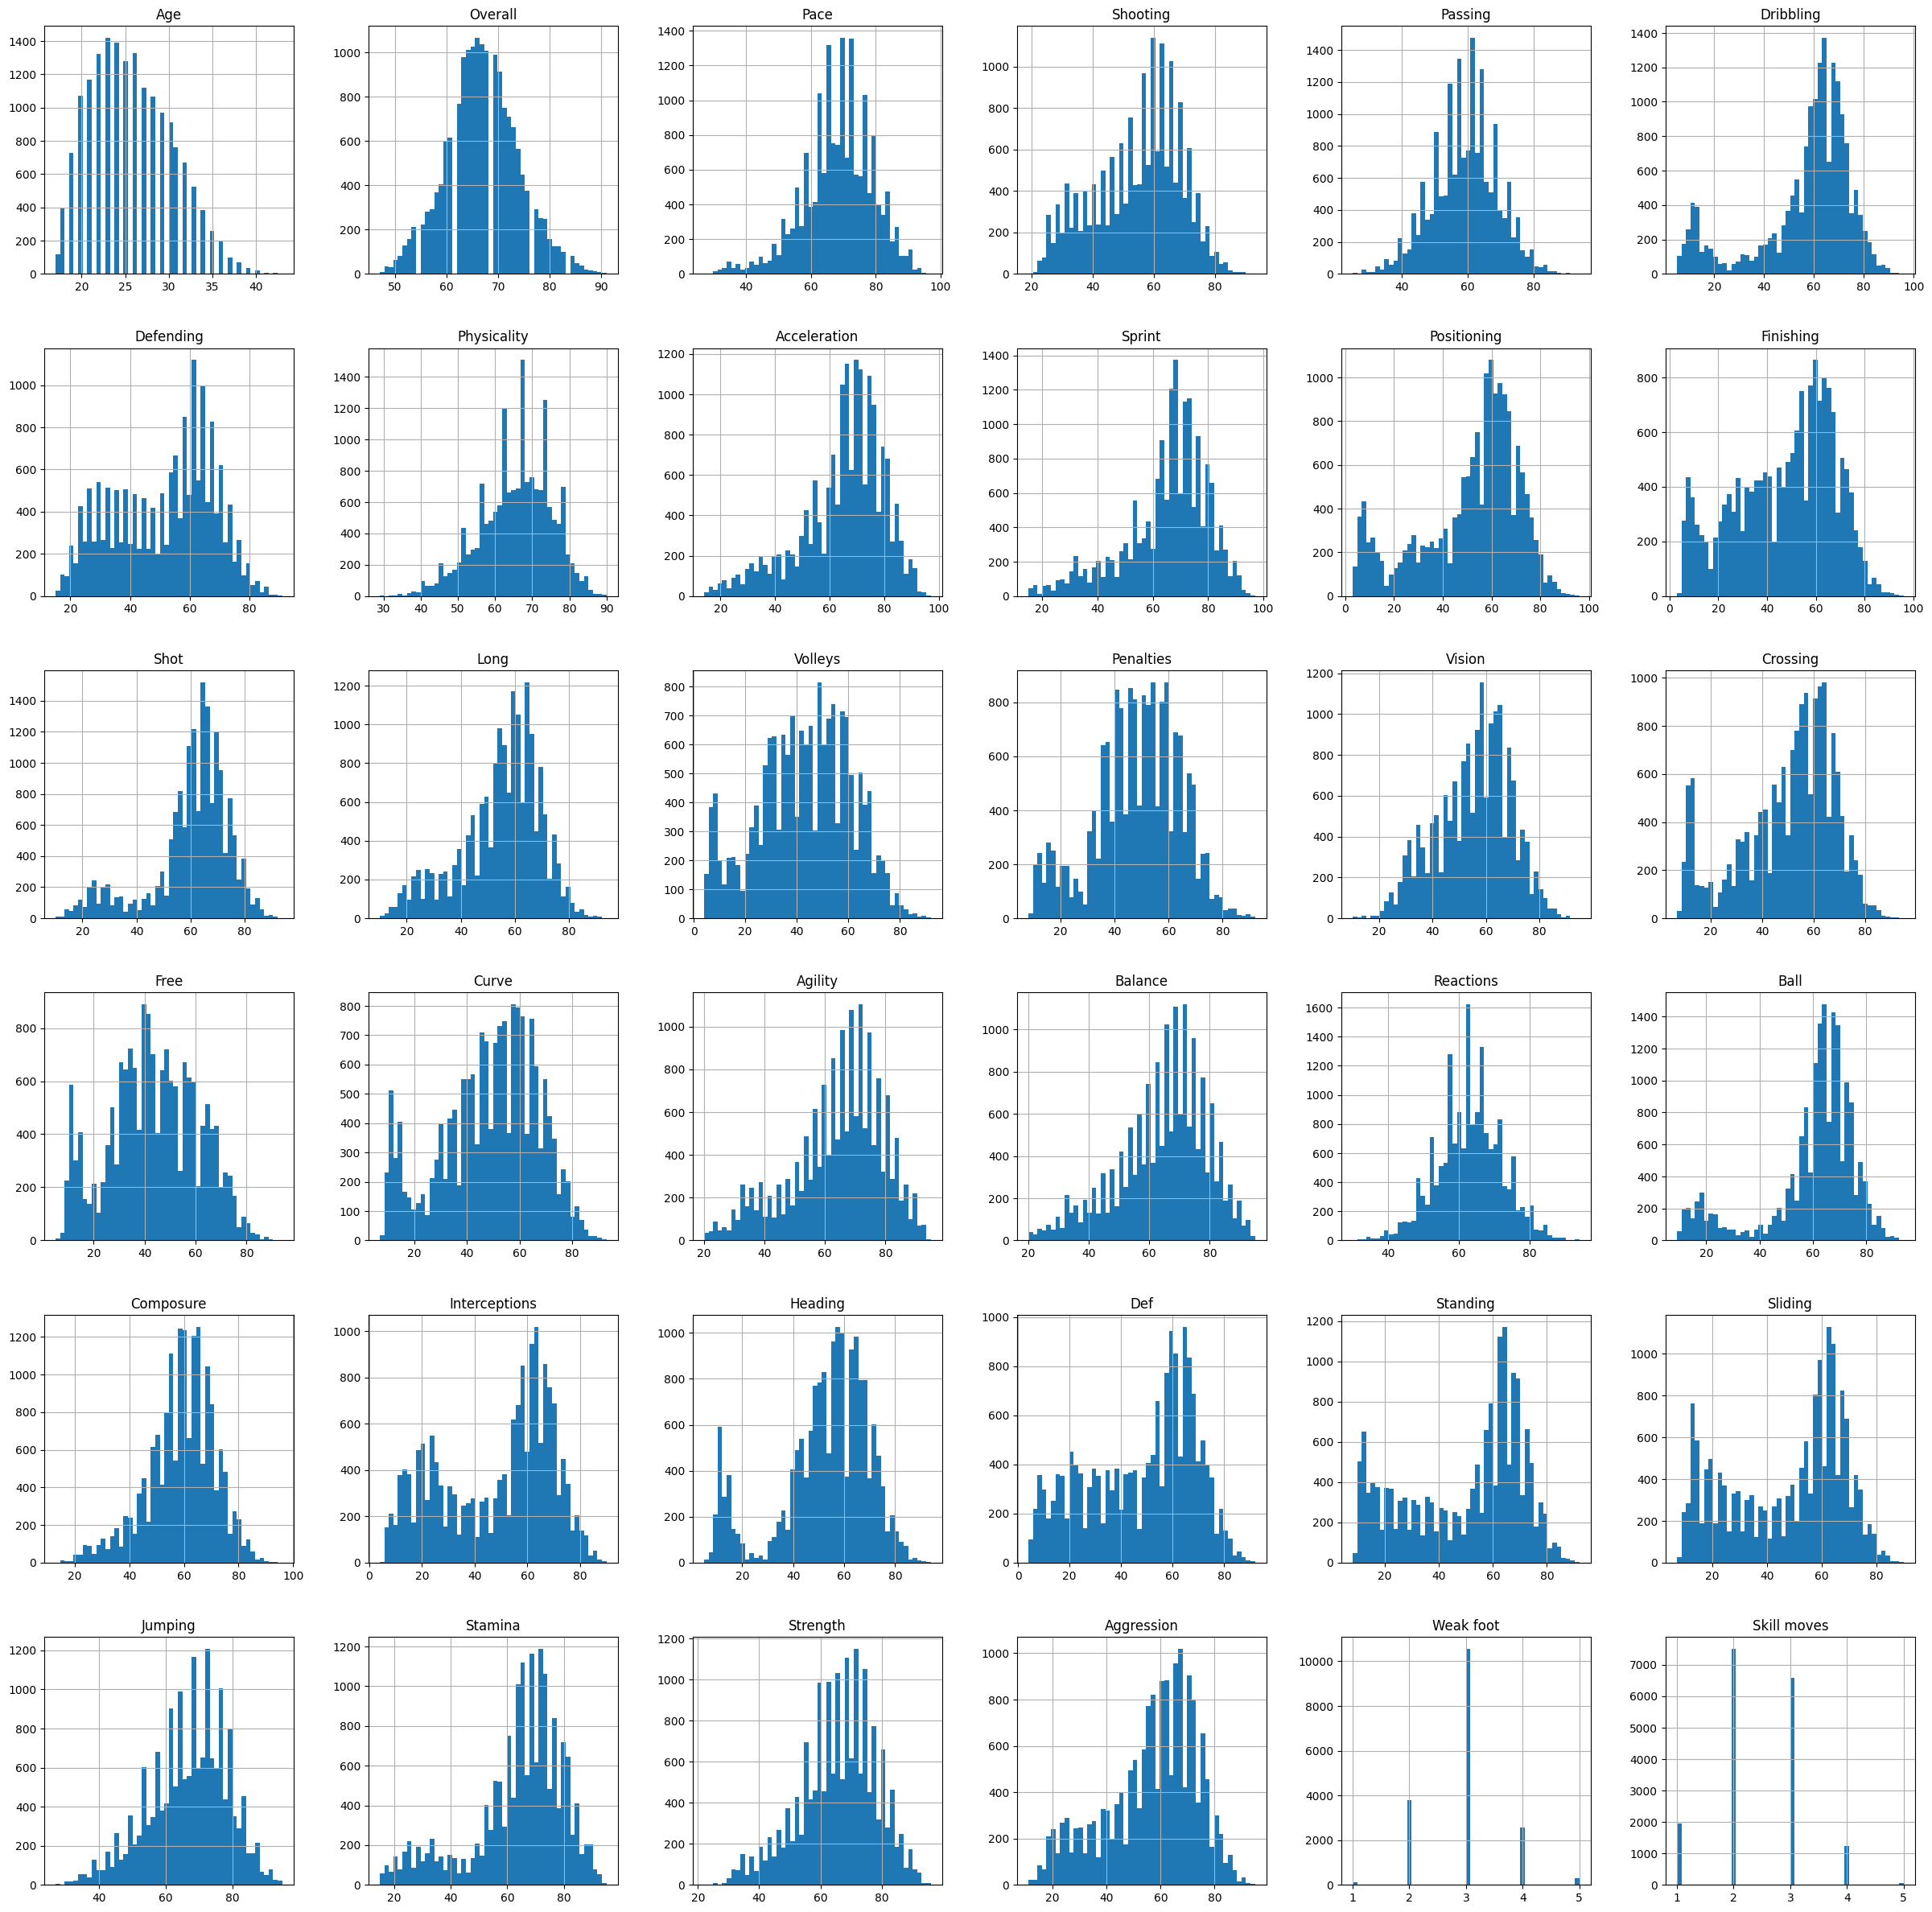

In [37]:
df.hist(bins=50, figsize=(30,30))
plt.show()

**A few comments about the data set :**

- the data set has about 17k rows and 46 columns. It is quite dense and clean, which seems to be good to train our model.
- every numerical features are between 0 and 100, except 'Weak foot' and 'Skill moves', which are integers between 0 and 5 (It would be a good idea to scale them at the same level), and 'Age'.

### A deeper study to get some insights

#### Position

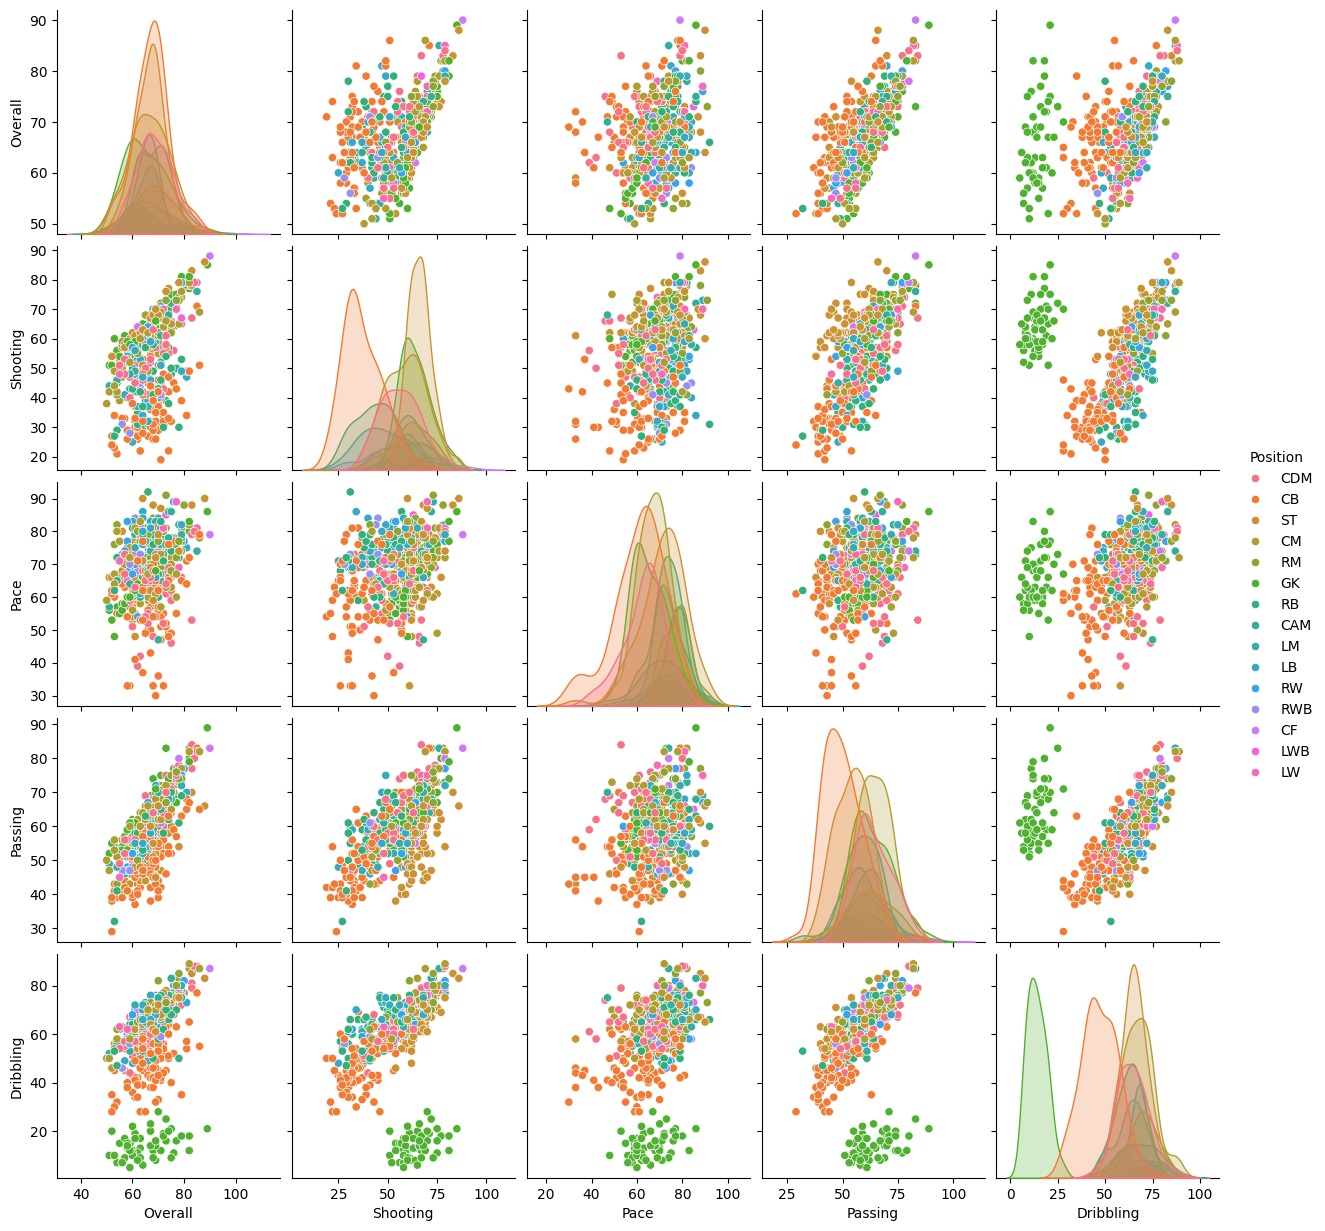

In [52]:
sns.pairplot(df[['Overall', 'Shooting', 'Pace', 'Passing', 'Dribbling', 'Position']].sample(500),
              hue='Position')

It would be better if we can regroup defenders, goal keepers, attackers and mid fielders together to have a better view (we can't see anything here).

#### Better look to the non numerical data

In [38]:
def plot_distribution(s, n) :
    counts = df[s].value_counts().head(n)
    plt.figure(figsize=(10,3))
    sns.barplot(x = counts.index, y = counts.values)
    plt.title(s+' Distribution')
    plt.xlabel(s)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    plt.show()

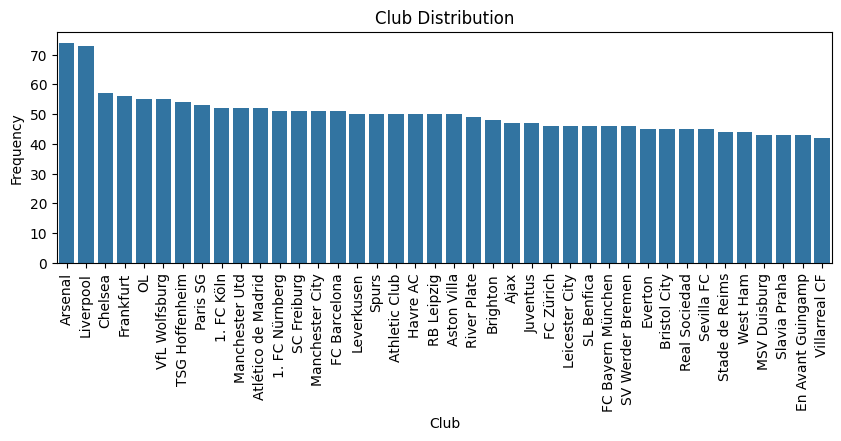

In [39]:
plot_distribution('Club', 40)

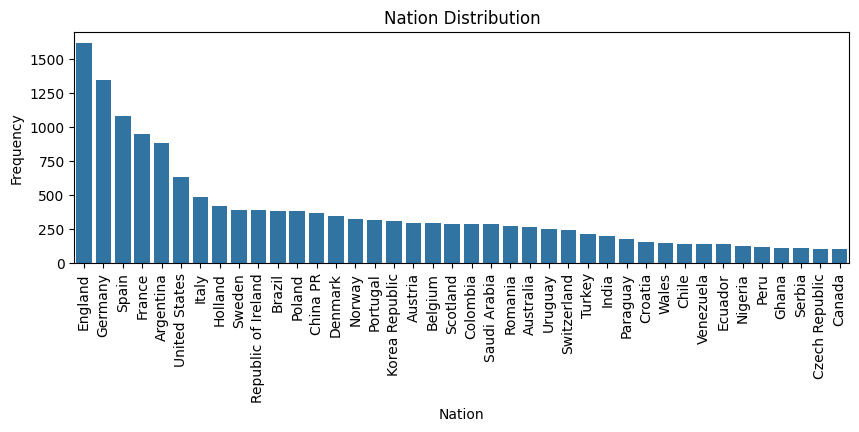

In [40]:
plot_distribution('Nation', 40)

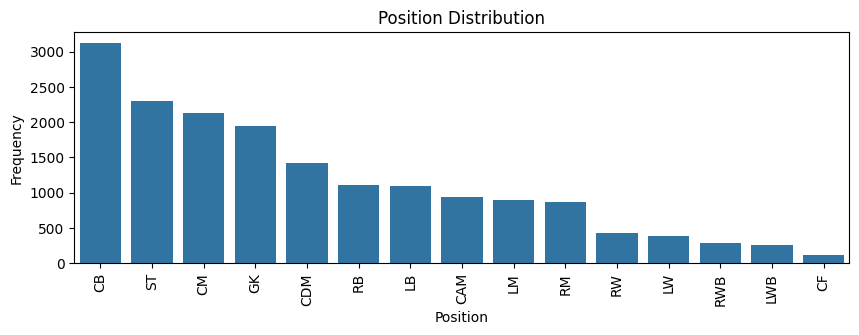

In [41]:
plot_distribution('Position', 20)

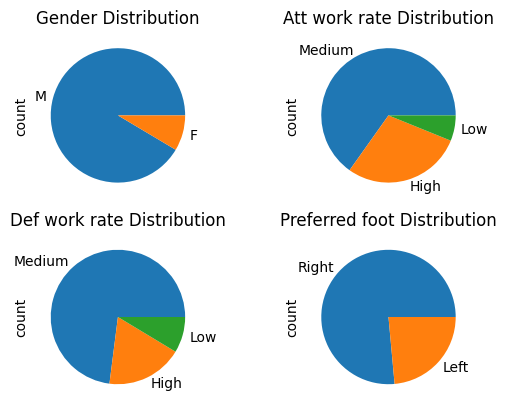

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

L = [('Gender',ax1), 
     ('Att work rate', ax2), 
     ('Def work rate', ax3), 
     ('Preferred foot', ax4)]

for feature, ax in L:
    df[feature].value_counts().plot.pie(ax=ax)
    ax.set_title(feature+' Distribution')

#### Correlations

In [43]:
corr_matrix = df.select_dtypes(['float64', 'int64']).corr()

<Figure size 800x800 with 0 Axes>

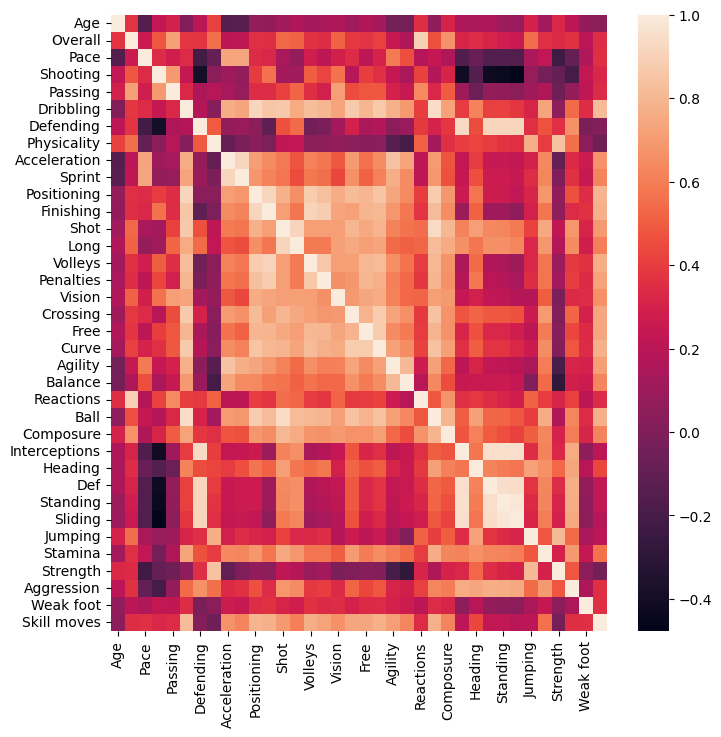

<Figure size 800x800 with 0 Axes>

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix)
plt.figure(figsize=(8,8))

There are lot of correlations in the data set.

We can even see groups of features that are correlated. Here are some examples :
- 'Interceptions', 'Def', 'Standing', 'Sliding' and 'Defending' are strongly correlated
- the square in the middle of the figure, from 'Positioning' to 'Curve'

Now let's focus on our target !

In [45]:
corr_matrix['Overall'].sort_values(ascending=False)

Overall          1.000000
Reactions        0.886394
Passing          0.714892
Composure        0.670532
Physicality      0.555535
Jumping          0.549062
Shot             0.530708
Vision           0.511729
Long             0.510566
Shooting         0.475240
Ball             0.461288
Curve            0.408387
Crossing         0.387663
Dribbling        0.378612
Free             0.375605
Defending        0.369658
Age              0.369558
Volleys          0.364798
Aggression       0.359801
Stamina          0.359625
Positioning      0.354754
Finishing        0.348377
Penalties        0.346828
Heading          0.346077
Skill moves      0.343780
Strength         0.333193
Def              0.311053
Interceptions    0.310003
Standing         0.277572
Pace             0.260301
Sliding          0.251253
Agility          0.244609
Sprint           0.216722
Weak foot        0.208212
Acceleration     0.205662
Balance          0.160235
Name: Overall, dtype: float64

In [46]:
#plotting only the top 5, we do not care about unnmaed which is just the id of the player
interesting_features = [ 'Overall', 'Reactions', 'Passing', 'Composure', 'Physicality']

<Figure size 640x480 with 0 Axes>

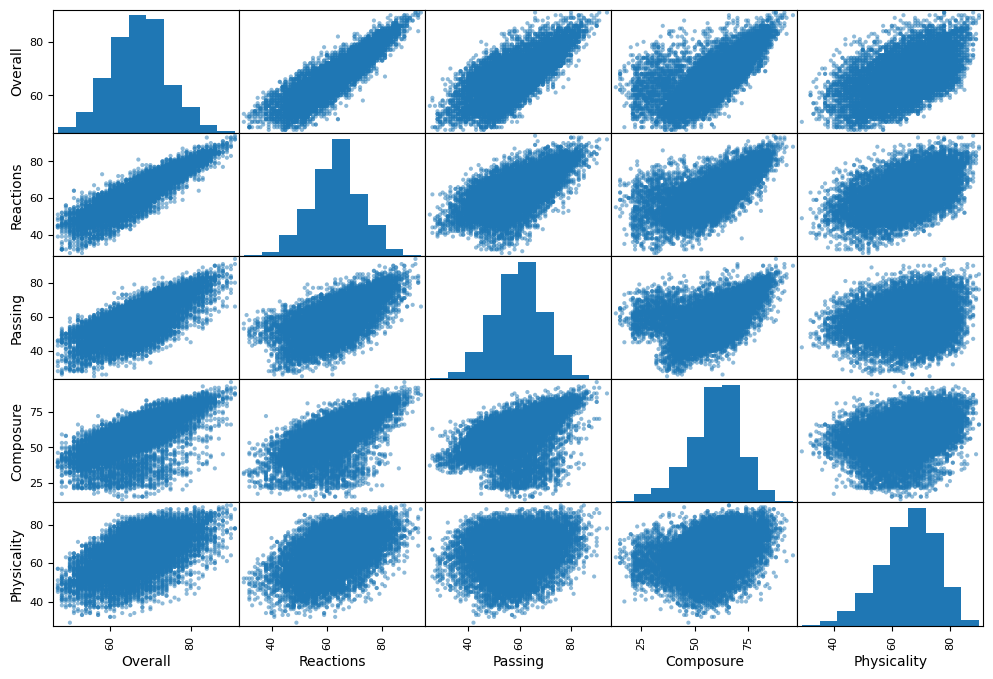

In [47]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(df[interesting_features], figsize=(12, 8))
plt.show()

With all this, we can see strong linear relationships, especially between 'Overall' and 'Reactions'.

At this stage, choising a linear model could be a good idea (at least a good start).

# PREPOCESSING

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Overall'], axis=1), 
                                                    df['Overall'], 
                                                    test_size=0.2)

In [62]:
X_train.shape

(13860, 42)

In [63]:
X_test.shape

(3466, 42)

### Numercial features

In [80]:
from sklearn.preprocessing import StandardScaler

numerical_prepocessor = (StandardScaler(), make_column_selector(dtype_exclude=object))

### Categorical features

In [64]:
from sklearn.preprocessing import OneHotEncoder

We shown this in the first part : 

- Att work rate----------------- ['High' 'Low' 'Medium']
- Def work rate----------------- ['Low' 'Medium' 'High']
- Gender------------------------ ['M' 'F']
- Preferred foot---------------- ['Right' 'Left']

Thanks to this information, we choose to use an OrdinalEncoder to transform these features. However, what can we do for 'Nation', 'Club' and 'Position'?

In [83]:
work_rate_prepocessor = (OneHotEncoder(categories=[['Low', 'Medium', 'High']]),
                         make_column_selector(pattern=['Att work rate', 'Def work rate']))

p = make_column_transformer(
    [
        ('ok', OneHotEncoder(categories=[['Low', 'Medium', 'High']]), ['Att work rate', 'Def work rate']) 
    ]
)

p.fit_transform(X_train)

ValueError: not enough values to unpack (expected 2, got 1)

First idea : using a OneHotEncoder too

In [65]:
categorical_prepocessor_1 = OneHotEncoder(handle_unknown='ignore')

In [ ]:
prepocessor_1 = make_column_transformer(
    numerical_prepocessor,
    
)

Seconde idea : using a 

# a faire / questions

- supprimer 'GK' ?
- pour encoder nation / club : faire le top 15 puis le reste(ou découper en 5 paquets max)
- idée d'un nouvel algorithme : prendre les stats et prédire le post (classification)